In [63]:
#import dependencies
import csv
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from config import api_key
from citipy import citipy
import random
import json
from pprint import pprint
import time


In [34]:
#import all the possible cities in the open weather current weasther api
current_open_cities =open('city.list.json').read()
possible_cities = json.loads(current_open_cities)
#pprint(possible_cities)
city_list_max = len(possible_cities)
city_list_max
num_min = 0

In [54]:
#take the number of possible cities and shuffle them to get an unduplicated list of random numbers
num_list = list(range(num_min,city_list_max,1))
random.shuffle(num_list)

In [55]:
#get the city id's for the 200 randomly selected numbers
city_id_list = []
i = 0
for i in range(200):
    city_id_list.append(possible_cities[num_list[i]]["id"])
#len(city_id_list)

200

In [64]:
api_url = 'http://api.openweathermap.org/data/2.5/weather?id='
units = 'imperial'
urlend = '&appid={}&units={}'.format( api_key, units)

In [74]:
#lists to hold individual data points for each city
city_id = []
city_name = []
city_country = []
city_lat = []
city_lon = []
city_temp = []
city_humid = []
city_cloudiness = []
city_wind = []
i = 0
#for-loop to meet the api call limit of 60 calls per minute. This should take about 4 minutes to run
for x in range(4):
    
    for i in range(50):
        response = requests.get(api_url + str(city_id_list[i])+ urlend).json()
        #print(json.dumps(response, indent=1, sort_keys=False))
        city_id.append(response['id'])
        city_name.append(response['name'])
        city_country.append(response['sys']['country'])
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
        city_temp.append(response['main']['temp_max'])
        city_humid.append(response['main']['humidity'])
        city_cloudiness.append(response['clouds']['all'])
        city_wind.append(response['wind']['speed'])
        i = i+50
    time.sleep(61)
print('Finished Running')

Finished Running


In [85]:
#create dictionary to display and use the city data pulled above
city_dict = {
    'API_City_ID': city_id,
    'City':city_name,
    'Country_Code': city_country,
    'Latitude':city_lat,
    'Longitude':city_lon,
    'Max Tempurature (F)':city_temp,
    'Humidity':city_humid,
    'Cloudiness_%':city_cloudiness,
    'Wind_(mph)':city_wind 
}
city_data = pd.DataFrame(city_dict)
city_data.head()

,API_City_ID,City,Country_Code,Latitude,Longitude,Max Tempurature (F),Humidity,Cloudiness_%,Wind_(mph)
0,3202698,Cernik,HR,45.29,17.38,66.20,88,0,2.24
1,3125006,Ciperez,ES,40.96,-6.27,53.60,81,0,3.36
2,7873505,Sankt Gallen,AT,47.66,14.61,59.00,87,20,2.24
3,8011791,Antuzede,PT,40.25,-8.48,66.20,88,90,9.17
4,6551108,Heiligengrabe,DE,53.15,12.35,64.77,85,0,2.59


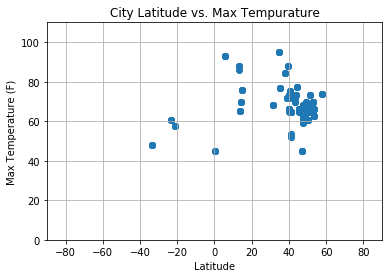

In [90]:
# Build 1st scatter plot
plt.figure(1)
plt.scatter(city_data["Latitude"], city_data["Max Tempurature (F)"], marker="o")
plt.title("City Latitude vs. Max Tempurature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90,10)
plt.ylim(0,110,10)
# Save the figure
plt.savefig("Temperature(F)_vs_Latitude.png")

plt.show()